Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import joblib


Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)

# Evaluate the model on training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Random Forest Accuracy on training data =', training_data_accuracy)

# Evaluate the model on test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Random Forest Accuracy on test data =', test_data_accuracy)


Random Forest Accuracy on training data = 1.0
Random Forest Accuracy on test data = 0.7207792207792207


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
filename = 'diabetes_model.sav'
prediction = rf_model.predict(input_data_reshaped)
joblib.dump( rf_model,open(filename, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# loading the saved model
loaded_model = joblib.load(open('diabetes_model.sav', 'rb'))
print(type(loaded_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [ ]:

classifier = svm.SVC(kernel='linear')

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)





print('Accuracy score of the test data : ', test_data_accuracy)
print('Accuracy score of the training data : ', training_data_accuracy)



Accuracy score of the test data :  0.7727272727272727
Accuracy score of the training data :  0.7833876221498371


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors

# Train the model
knn_classifier.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = knn_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data with KNN: ', training_data_accuracy)

# Accuracy score on the test data
X_test_prediction = knn_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data with KNN: ', test_data_accuracy)


Accuracy score of the training data with KNN:  0.7980456026058632
Accuracy score of the test data with KNN:  0.7272727272727273


In [ ]:

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
logistic_regression_classifier = LogisticRegression(max_iter=200)  # You can adjust the max_iter

# Train the model
logistic_regression_classifier.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = logistic_regression_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data with Logistic Regression: ', training_data_accuracy)

# Accuracy score on the test data
X_test_prediction = logistic_regression_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data with Logistic Regression: ', test_data_accuracy)


Accuracy score of the training data with Logistic Regression:  0.7882736156351792
Accuracy score of the test data with Logistic Regression:  0.7597402597402597


In [ ]:
# Initialize the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
# Train the model
decision_tree_classifier.fit(X_train, Y_train)
# Accuracy score on the training data
X_train_prediction = decision_tree_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data with Decision Tree: ', training_data_accuracy)

# Accuracy score on the test data
X_test_prediction = decision_tree_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data with Decision Tree: ', test_data_accuracy)

Accuracy score of the training data with Decision Tree:  1.0
Accuracy score of the test data with Decision Tree:  0.6948051948051948


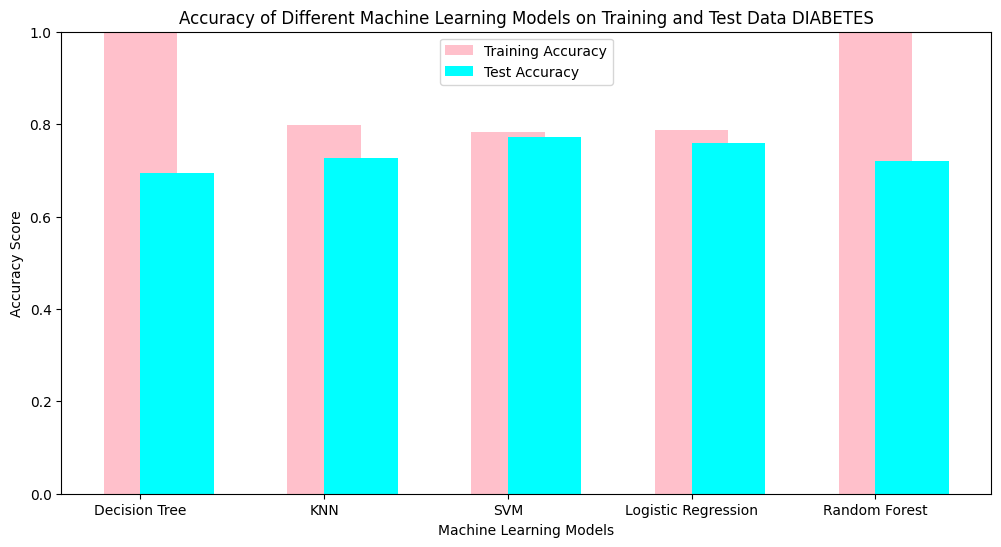

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate the accuracy scores for training and test data
decision_tree_train_accuracy = accuracy_score(Y_train, decision_tree_classifier.predict(X_train))
decision_tree_test_accuracy = accuracy_score(Y_test, decision_tree_classifier.predict(X_test))

knn_train_accuracy = accuracy_score(Y_train, knn_classifier.predict(X_train))
knn_test_accuracy = accuracy_score(Y_test, knn_classifier.predict(X_test))

svm_train_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
svm_test_accuracy = accuracy_score(Y_test, classifier.predict(X_test))

logistic_regression_train_accuracy = accuracy_score(Y_train, logistic_regression_classifier.predict(X_train))
logistic_regression_test_accuracy = accuracy_score(Y_test, logistic_regression_classifier.predict(X_test))

random_forest_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
random_forest_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

# Accuracy scores for different models
models = ['Decision Tree', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest']
train_accuracy = [
    decision_tree_train_accuracy,
    knn_train_accuracy,
    svm_train_accuracy,
    logistic_regression_train_accuracy,
    random_forest_train_accuracy
]
test_accuracy = [
    decision_tree_test_accuracy,
    knn_test_accuracy,
    svm_test_accuracy,
    logistic_regression_test_accuracy,
    random_forest_test_accuracy
]

# Create bar graph
x = range(len(models))

plt.figure(figsize=(12, 6))

# Bar graph for training accuracy
plt.bar(x, train_accuracy, width=0.4, label='Training Accuracy', align='center', color='pink')

# Bar graph for test accuracy
plt.bar(x, test_accuracy, width=0.4, label='Test Accuracy', align='edge', color='cyan')

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Different Machine Learning Models on Training and Test Data DIABETES')
plt.xticks(x, models)
plt.ylim(0, 1)  # Set y-axis limits to 0-1
plt.legend()
plt.show()
